### 주제 : 서울시 자치구별 거주인구 현황 분석으로 중구 특성 도출
- 데이터 출처 : kosis
- 시간 범위   : 2022~2024
- 공감 범위   : 서울특별시

In [10]:
import matplotlib.pyplot as plt
import pandas            as pd
import seaborn           as sns

In [11]:
plt.rcParams["font.family"] = "Malgun Gothic"

In [8]:
# 파일 경로 지정
file_path = r"D:\SEOUL\주민등록인구.xlsx"

# 엑셀 파일 읽어서 seoul 데이터프레임에 저장
seoul = pd.read_excel(file_path)

# 데이터 확인
print(seoul.head())

  행정구역     연령대    연도  총인구수
0  종로구  0 - 4세  2022  2512
1  종로구  0 - 4세  2023  2342
2  종로구  0 - 4세  2024  2254
3  종로구  5 - 9세  2022  3891
4  종로구  5 - 9세  2023  3577


In [9]:
# 데이터 기본 정보 확인
print("📌 데이터 기본 정보")
print(seoul.info())

# 데이터 크기 (행, 열)
print("\n📌 데이터 크기 (행, 열):", seoul.shape)

# 컬럼명
print("\n📌 컬럼명:")
print(seoul.columns.tolist())

# 결측치 확인
print("\n📌 결측치 개수:")
print(seoul.isnull().sum())

# 수치형 변수 요약 통계
print("\n📌 수치형 변수 요약 통계")
print(seoul.describe())


📌 데이터 기본 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   행정구역    1575 non-null   object
 1   연령대     1575 non-null   object
 2   연도      1575 non-null   int64 
 3   총인구수    1575 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 49.3+ KB
None

📌 데이터 크기 (행, 열): (1575, 4)

📌 컬럼명:
['행정구역', '연령대', '연도', '총인구수']

📌 결측치 개수:
행정구역    0
연령대     0
연도      0
총인구수    0
dtype: int64

📌 수치형 변수 요약 통계
                연도          총인구수
count  1575.000000   1575.000000
mean   2023.000000  17870.624762
std       0.816756  13177.324271
min    2022.000000     22.000000
25%    2022.000000   7204.000000
50%    2023.000000  16268.000000
75%    2024.000000  27212.000000
max    2024.000000  72767.000000


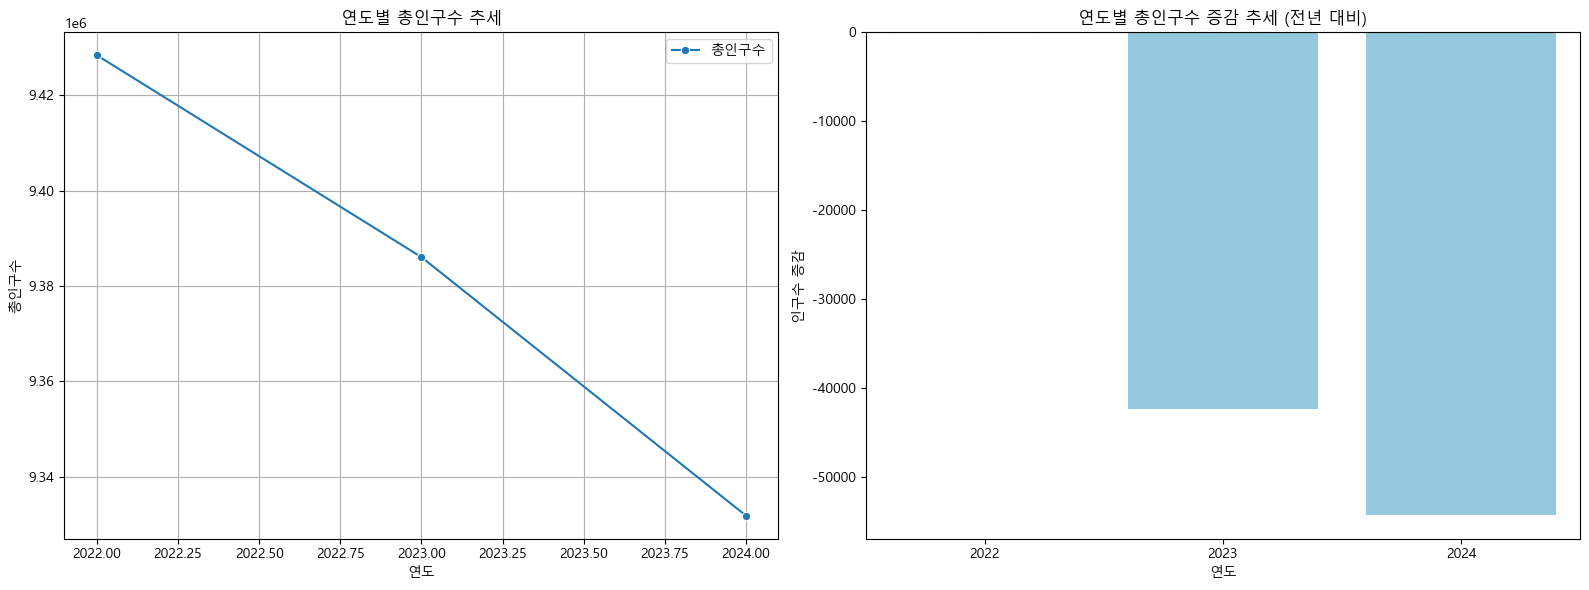

In [18]:
# 1. 연도별 총인구수 합계 계산
yearly_pop = seoul.groupby("연도")["총인구수"].sum().reset_index()

# 2. 전년 대비 증감 계산
yearly_pop["증감"] = yearly_pop["총인구수"].diff()

# 3. 한 행에 그래프 2개 배치
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# (왼쪽) 라인 그래프: 총인구수 추세
sns.lineplot(ax=axes[0], data=yearly_pop, x="연도", y="총인구수", marker="o", label="총인구수")
axes[0].set_title("연도별 총인구수 추세")
axes[0].set_xlabel("연도")
axes[0].set_ylabel("총인구수")
axes[0].grid(True)
axes[0].legend()

# (오른쪽) 막대 그래프: 전년 대비 증감
sns.barplot(ax=axes[1], data=yearly_pop, x="연도", y="증감", color="skyblue")
axes[1].axhline(0, color="red", linestyle="--")
axes[1].set_title("연도별 총인구수 증감 추세 (전년 대비)")
axes[1].set_xlabel("연도")
axes[1].set_ylabel("인구수 증감")

plt.tight_layout()
plt.show()

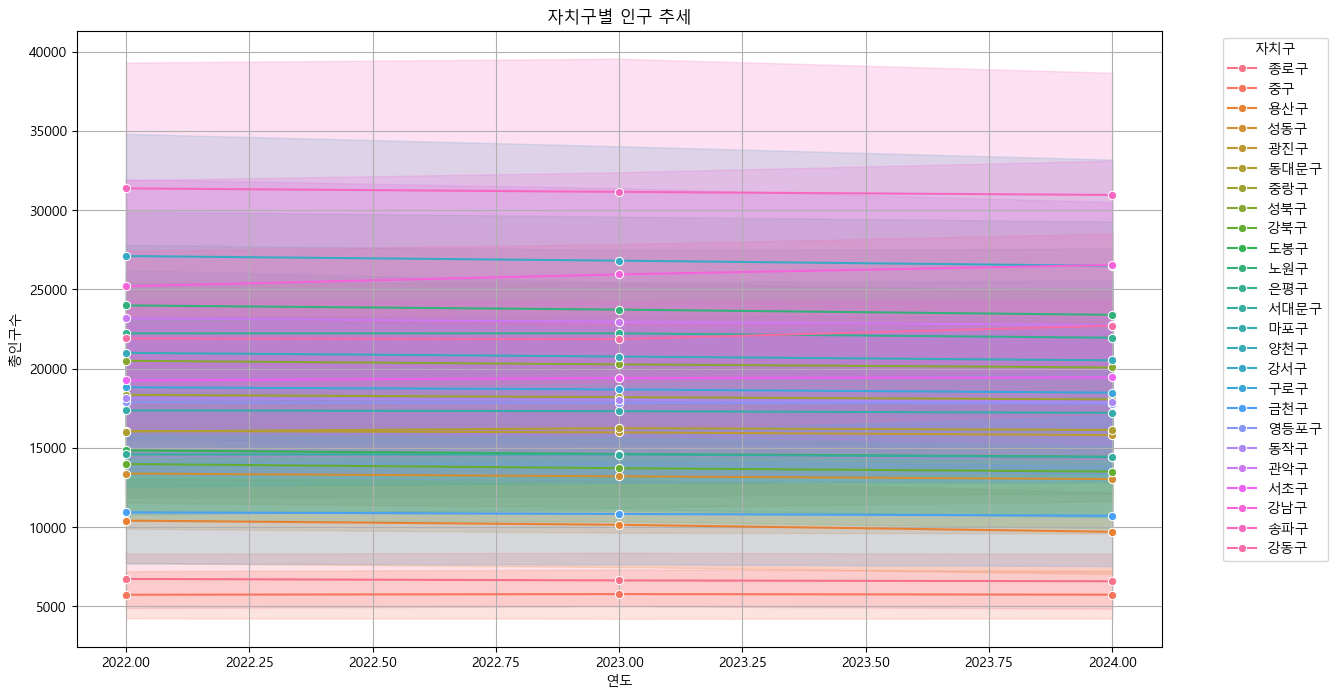

In [24]:
plt.figure(figsize=(14,8))
sns.lineplot(data=seoul, x="연도", y="총인구수", hue="행정구역", marker="o")

plt.title("자치구별 인구 추세")
plt.xlabel("연도")
plt.ylabel("총인구수")
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

📌 상승 추세 자치구: ['강남구', '서초구']


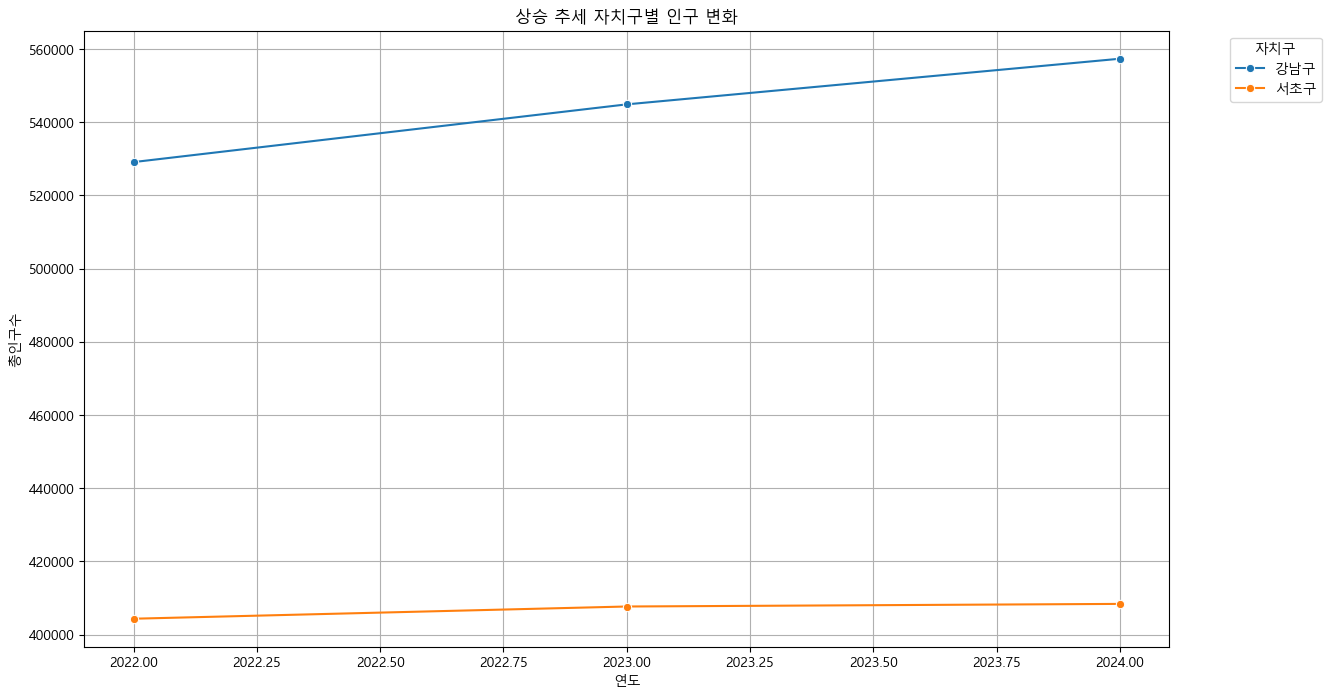

In [28]:
# 1. 자치구별 연도별 총인구수 집계
grouped = seoul.groupby(["행정구역", "연도"])["총인구수"].sum().reset_index()

# 2. 자치구별 연도별 증감 계산
grouped["증감"] = grouped.groupby("행정구역")["총인구수"].diff()

# 3. 모든 연도에서 증가(또는 유지)한 자치구만 필터링
increasing_districts = (
    grouped.groupby("행정구역")["증감"]
    .apply(lambda x: (x.dropna() >= 0).all())   # dropna()로 첫 연도 제외
)
increasing_districts = increasing_districts[increasing_districts].index.tolist()

print("📌 상승 추세 자치구:", increasing_districts)

# 4. 그래프로 시각화
plt.figure(figsize=(14,8))
sns.lineplot(
    data=grouped[grouped["행정구역"].isin(increasing_districts)],
    x="연도", y="총인구수", hue="행정구역", marker="o"
)

plt.title("상승 추세 자치구별 인구 변화")
plt.xlabel("연도")
plt.ylabel("총인구수")
plt.legend(title="자치구", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

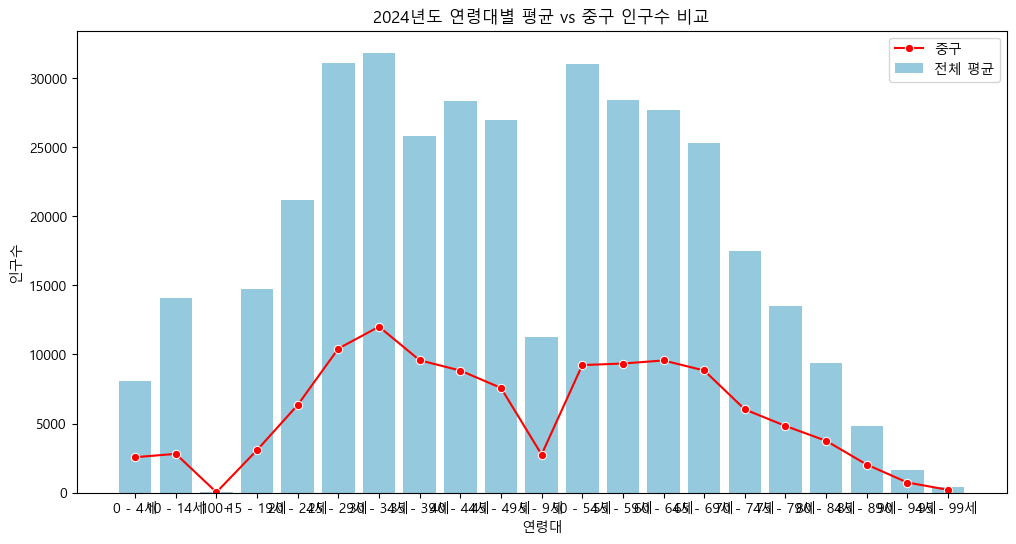

In [23]:
# 1. 2024년도 데이터 필터링
data_2024 = seoul[seoul["연도"] == 2024]

# 2. 연령대별 전체 평균 인구수 계산
avg_by_age = data_2024.groupby("연령대")["총인구수"].mean().reset_index()
avg_by_age.rename(columns={"총인구수": "평균인구수"}, inplace=True)

# 3. 중구 데이터 추출
junggu_by_age = data_2024[data_2024["행정구역"] == "중구"][["연령대", "총인구수"]]
junggu_by_age.rename(columns={"총인구수": "중구인구수"}, inplace=True)

# 4. 합치기
compare_df = pd.merge(avg_by_age, junggu_by_age, on="연령대", how="inner")

# 5. 시각화 (막대그래프 + 선그래프)
plt.figure(figsize=(12,6))
# 전체 평균은 막대그래프
sns.barplot(data=compare_df, x="연령대", y="평균인구수", color="skyblue", label="전체 평균")
# 중구 인구수는 선그래프로 표시
sns.lineplot(data=compare_df, x="연령대", y="중구인구수", marker="o", color="red", label="중구")

plt.title("2024년도 연령대별 평균 vs 중구 인구수 비교")
plt.xlabel("연령대")
plt.ylabel("인구수")
plt.legend()
plt.show()